In [3]:
import pandas as pd

In [8]:
!head /workspace/datasets/train.csv

In [3]:
df = pd.read_csv('/workspace/datasets/train.csv')

In [4]:
df.head()

,user,sku,category,query,click_time,query_time
0,000000df17cd56a5df4a94074e133c9d4739fae3,2125233,abcat0101001,Televisiones Panasonic 50 pulgadas,2011-09-01 23:44:52.533,2011-09-01 23:43:59.752
1,000001928162247ffaf63185cd8b2a244c78e7c6,2009324,abcat0101001,Sharp,2011-09-05 12:25:37.42,2011-09-05 12:25:01.187
2,000017f79c2b5da56721f22f9fdd726b13daf8e8,1517163,pcmcat193100050014,nook,2011-08-24 12:56:58.91,2011-08-24 12:55:13.012
3,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877125,abcat0101001,rca,2011-10-25 07:18:14.722,2011-10-25 07:16:51.759
4,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877134,abcat0101005,rca,2011-10-25 07:19:51.697,2011-10-25 07:16:51.759


In [3]:
# df[0:10]['click_time']
df['click_time_dt'] = pd.to_datetime(df['click_time'])

In [4]:
df['query_time_dt'] = pd.to_datetime(df['query_time'])

<AxesSubplot:xlabel='click_time_dt'>

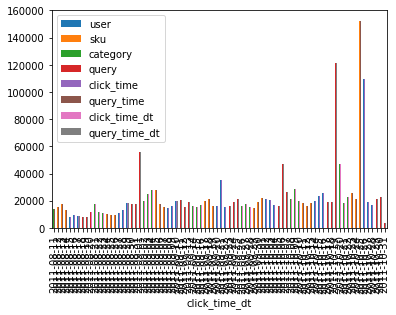

In [19]:
df.groupby(df['click_time_dt'].dt.date).count().plot(kind='bar')

<AxesSubplot:xlabel='query_time_dt'>

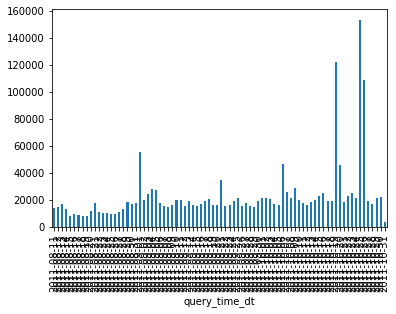

In [23]:
df['query_time_dt'].groupby(df['query_time_dt'].dt.date).count().plot(kind='bar')

<AxesSubplot:xlabel='category,click_time_dt'>

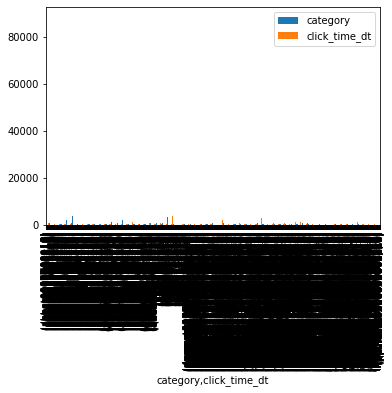

In [24]:
df[['category', 'click_time_dt']].groupby([df['category'], df['click_time_dt'].dt.month]).count().plot(kind='bar')

In [5]:
# df['category_prefix'] = df['category'].str.split()
df_category_split = df['category'].str.split(r'^([a-z]*)(.*)$', expand=True)
df['category_prefix'] = df_category_split[1]
df['category_suffix'] = df_category_split[2]

In [49]:
df['category_prefix'].groupby(df['category_prefix']).count()

category_prefix
              63
abcat     680337
cat       299942
pcmcat    884927
Name: category_prefix, dtype: int64

<AxesSubplot:xlabel='click_time_dt,category_prefix'>

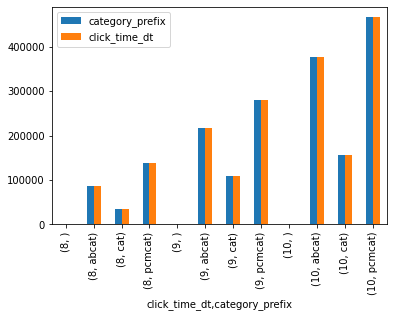

In [12]:
df[['category_prefix', 'click_time_dt']].groupby([df['click_time_dt'].dt.month, df['category_prefix']]).count().plot(kind='bar')

In [6]:
c = df['sku'].groupby(df['sku']).count()

In [7]:
cf = pd.DataFrame()

In [8]:
cf['skus'] = c.index

In [9]:
cf['counts'] = c.values

In [11]:
cf.head()

,skus,counts
0,43900,2
1,48530,5
2,127687,8
3,150115,1
4,185230,4


In [10]:
cf.sort_values(by=['counts'], ascending=False, inplace=True)

In [ ]:
cf[0:100].plot(kind='bar')

In [13]:
len(cf)

69858

## Category EDA

In [3]:
!find /workspace/datasets/

/workspace/datasets/
/workspace/datasets/popular_skus.py
/workspace/datasets/product_data
/workspace/datasets/product_data/categories
/workspace/datasets/product_data/categories/categories_0001_abcat0010000_to_pcmcat99300050000.xml
/workspace/datasets/product_data/products
/workspace/datasets/product_data/products/products_0001_2570_to_430420.xml
/workspace/datasets/product_data/products/products_0002_430439_to_518210.xml
/workspace/datasets/product_data/products/products_0003_518229_to_606384.xml
/workspace/datasets/product_data/products/products_0004_606428_to_722720.xml
/workspace/datasets/product_data/products/products_0005_722800_to_846222.xml
/workspace/datasets/product_data/products/products_0006_846231_to_1002890.xml
/workspace/datasets/product_data/products/products_0007_1002897_to_1067124.xml
/workspace/datasets/product_data/products/products_0008_1067160_to_1156147.xml
/workspace/datasets/product_data/products/products_0009_1156156_to_1230126.xml
/workspace/datasets/product_

In [6]:
!head -50 /workspace/datasets/product_data/categories/categories_0001_abcat0010000_to_pcmcat99300050000.xml

<categories>
  <category>
    <id>abcat0010000</id>
    <name>Gift Center</name>
    <path>
      <category>
        <id>cat00000</id>
        <name>Best Buy</name>
      </category>
      <category>
        <id>abcat0010000</id>
        <name>Gift Center</name>
      </category>
    </path>
    <subCategories>
      <category>
        <id>pcmcat140000050035</id>
        <name>Capturing Photos &amp; Videos</name>
      </category>
      <category>
        <id>pcmcat140000050036</id>
        <name>Listening to Digital Music</name>
      </category>
      <category>
        <id>pcmcat140000050037</id>
        <name>Computing Made Easy</name>
      </category>
      <category>
        <id>pcmcat140000050039</id>
        <name>Simple GPS Navigation</name>
      </category>
      <category>
        <id>pcmcat140000050040</id>
        <name>Playing Video Games</name>
      </category>
      <category>
        <id>pcmcat140000050041</id>
        <name>Watching HDTV</name>
      </category>
  

In [1]:
import xml.etree.ElementTree as ET

cat_file = '/workspace/datasets/product_data/categories/categories_0001_abcat0010000_to_pcmcat99300050000.xml'
tree = ET.parse(cat_file)
root = tree.getroot()

In [2]:
# subcats = pd.DataFrame(columns=['subcategory_id', 'subcategory_name', 'category_id', 'category_name'])
subcats = []

In [4]:
for category in root:
    category_id = category.find('id').text
    category_name = category.find('name').text
    subcategories = category.find('subCategories')
    paths = category.find('path')
    path_ids = "/"
    path_names = "/"
    for category in paths:
        path_ids += category.find('id').text + "/"
        path_names += category.find('name').text + "/"
    for subcategory in subcategories:
        subcat_id = subcategory.find('id').text
        subcat_name = subcategory.find('name').text
        subcats.append([subcat_id, subcat_name, category_id, category_name, path_ids, path_names])

In [5]:
sdf = pd.DataFrame(subcats, columns=['subcategory_id', 'subcategory_name', 'category_id', 'category_name', 'path_ids', 'path_names'])

In [6]:
sdf.head()

,subcategory_id,subcategory_name,category_id,category_name,path_ids,path_names
0,pcmcat140000050035,Capturing Photos & Videos,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
1,pcmcat140000050036,Listening to Digital Music,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
2,pcmcat140000050037,Computing Made Easy,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
3,pcmcat140000050039,Simple GPS Navigation,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
4,pcmcat140000050040,Playing Video Games,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/


In [8]:
sdf[sdf['category_id'] == 'abcat0010000']

,subcategory_id,subcategory_name,category_id,category_name,path_ids,path_names
0,pcmcat140000050035,Capturing Photos & Videos,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
1,pcmcat140000050036,Listening to Digital Music,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
2,pcmcat140000050037,Computing Made Easy,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
3,pcmcat140000050039,Simple GPS Navigation,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
4,pcmcat140000050040,Playing Video Games,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
5,pcmcat140000050041,Watching HDTV,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
6,pcmcat140000050042,Enjoying Favorite Movies,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
7,abcat0012000,Him,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
8,abcat0011000,Her,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
9,abcat0013000,Teens,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/


In [10]:
sdf[sdf['category_id'] == 'cat00000']

,subcategory_id,subcategory_name,category_id,category_name,path_ids,path_names
1660,abcat0100000,TV & Home Theater,cat00000,Best Buy,/cat00000/,/Best Buy/
1661,abcat0200000,Audio & MP3,cat00000,Best Buy,/cat00000/,/Best Buy/
1662,abcat0207000,Musical Instruments,cat00000,Best Buy,/cat00000/,/Best Buy/
1663,abcat0400000,Cameras & Camcorders,cat00000,Best Buy,/cat00000/,/Best Buy/
1664,abcat0500000,Computers & Tablets,cat00000,Best Buy,/cat00000/,/Best Buy/
1665,abcat0300000,"Car, Marine & GPS",cat00000,Best Buy,/cat00000/,/Best Buy/
1666,abcat0800000,Mobile Phones,cat00000,Best Buy,/cat00000/,/Best Buy/
1667,abcat0600000,Movies & Music,cat00000,Best Buy,/cat00000/,/Best Buy/
1668,abcat0700000,Video Games,cat00000,Best Buy,/cat00000/,/Best Buy/
1669,abcat0900000,Appliances,cat00000,Best Buy,/cat00000/,/Best Buy/


## Product EDA

In [37]:
prod_file = '/workspace/datasets/product_data/products/products_0001_2570_to_430420.xml'

In [38]:
tree = ET.parse(prod_file)
root = tree.getroot()

In [40]:
!head -50 $prod_file

<products>
  <product>
    <sku>2570</sku>
    <productId>1051806942127</productId>
    <name>Fuji - 110 Color Print Disc Film (24 exposures)</name>
    <source>bestbuy</source>
    <type>HardGood</type>
    <startDate>2000-03-01</startDate>
    <new>false</new>
    <active>false</active>
    <activeUpdateDate>2012-07-02T22:28:55</activeUpdateDate>
    <regularPrice>1.89</regularPrice>
    <salePrice>1.89</salePrice>
    <onSale>false</onSale>
    <planPrice/>
    <priceWithPlan/>
    <advertisedPriceRestriction>false</advertisedPriceRestriction>
    <minimumDisplayPrice/>
    <restrictedSalePrice>1.89</restrictedSalePrice>
    <icrType/>
    <icrStartDate/>
    <icrEndDate/>
    <priceUpdateDate>2012-07-02T22:28:55</priceUpdateDate>
    <digital>false</digital>
    <preowned>false</preowned>
    <carrierPlans/>
    <technologyCode/>
    <carrierModelNumber/>
    <earlyTerminationFees/>
    <outletCenter/>
    <secondaryMarket/>
    <frequentlyPurchasedWith/>
    <accessories/>
    <re

In [41]:
prodf = pd.read_xml(prod_file)

In [50]:
pd.set_option('display.expand_frame_repr', False)

In [57]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(prodf.iloc[0], "\n---")
    print(prodf.iloc[1], "\n---")
    print(prodf.iloc[2], "\n---")


sku                                                                           2570
productId                                                            1051806942127
name                               Fuji - 110 Color Print Disc Film (24 exposures)
source                                                                     bestbuy
type                                                                      HardGood
startDate                                                               2000-03-01
new                                                                          False
active                                                                       False
activeUpdateDate                                               2012-07-02T22:28:55
regularPrice                                                                  1.89
salePrice                                                                     1.89
onSale                                                                       False
plan